<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(suppress=True)

from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as axes3d

import sympy as sp

from scipy import special
from scipy import integrate
from scipy.signal import argrelextrema

## Problem 2

Antenna Size ($2^n \times 2^n$)

In [2]:
# directivity
n = np.array([1, 2, 3, 4, 5])
Ap = (2**n)**2
D = 4*np.pi*Ap
D_dB = 10*np.log10(D)
print('D (dB): ', D_dB)

# efficiency (loss)
freq = 3e9
c = 3e8
n = 1
wvlen = c/freq*1e2 # in cm
loss_per_cm = 0.1
loss_factor = 0
for i in range(n):
    loss_factor = loss_factor + 2*2**(i-1)*wvlen*loss_per_cm
print(loss_factor)

D (dB):  [17.01269855 23.03329847 29.05389838 35.07449829 41.09509821]
1.0


## Problem 3

### Part 2

In [0]:
er = 4
b = 0.5/np.sqrt(er)
a = 1.5*b
dx = a
dy = b
k = 2*np.pi

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psiy = k*dy*np.sin(theta)*np.sin(phi)
    AFy = 1 + np.exp(1j*psiy)
    return np.abs(AFy)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    psix = k*dx*np.sin(theta)*np.cos(phi)
    return np.abs(np.sqrt(np.sin(phi)**2+(np.cos(theta)*np.cos(phi))**2)*np.sinc(psix/2))
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

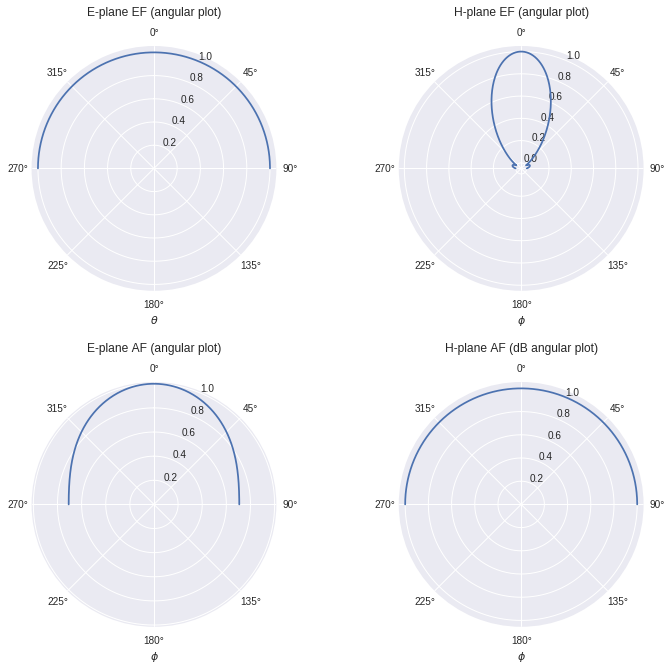

In [63]:
scale = 'lin'
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

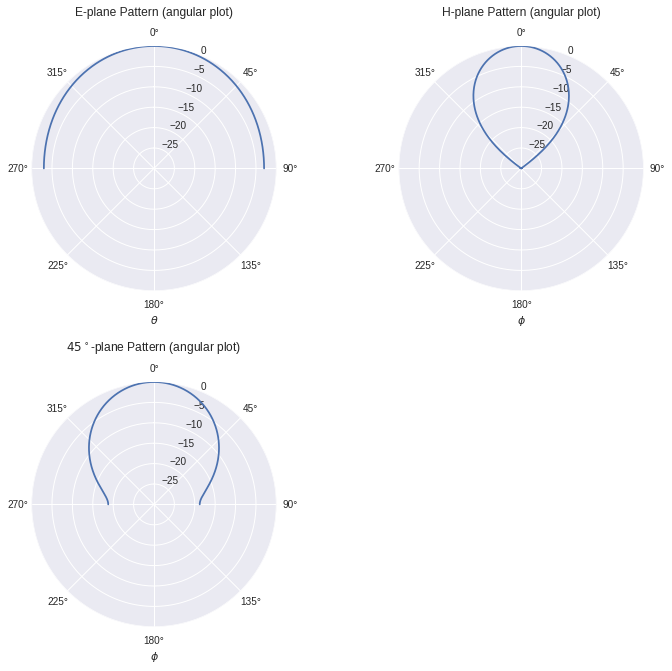

In [64]:
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, 0)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/4)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

In [65]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi/2)[0]
print('beam solid angle = ', round(beam_solid_angle,2))
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

beam solid angle =  1.66
directivity =  7.55
directivity (dB) =  8.78


### Part 3

In [0]:
er = 4
b = 0.5/np.sqrt(er) # *wvlen in air
a = 1.5*b
k = 2*np.pi # /wvlen in air
ky = np.pi/b # /wvlen in air

num_pts_theta = 200
num_pts_phi = 200
theta, phi = np.linspace(0, np.pi/2, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

In [0]:
def AF_un(theta, phi):
    psix = k*a*np.sin(theta)*np.cos(phi)
    AFx = 1 - np.exp(1j*psix)
    return np.abs(AFx)
  
AF_un_max = AF_un(theta2d, phi2d).max()
  
def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max

def EF_un(theta, phi):
    psiy = k*b*np.sin(theta)*np.sin(phi)
    num = ky*np.cos(0.5*ky*b)*np.sin(0.5*psiy)-k*np.sin(theta)*np.sin(phi)*np.sin(0.5*ky*b)*np.cos(0.5*psiy)
    den = (k*np.sin(theta)*np.sin(phi))**2-ky**2
    return np.abs(num/den)
  
EF_un_max = EF_un(theta2d, phi2d).max()
  
def EF_n(theta, phi):
    return EF_un(theta, phi)/EF_un_max

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF_un(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


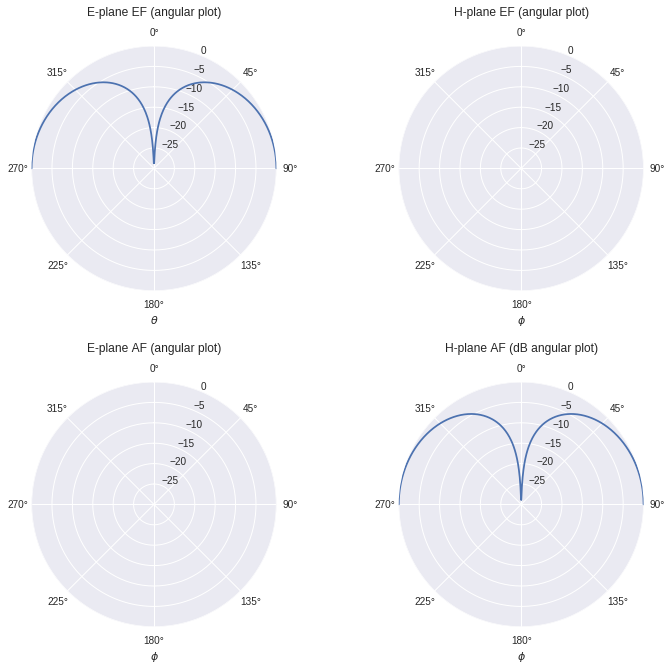

In [85]:
scale = 'dB'
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (EF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(EF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane EF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, np.pi/2)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane AF (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(224, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (AF_n(theta, 0)))
else:
    ax.plot(theta, 20*np.log10(AF_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane AF (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


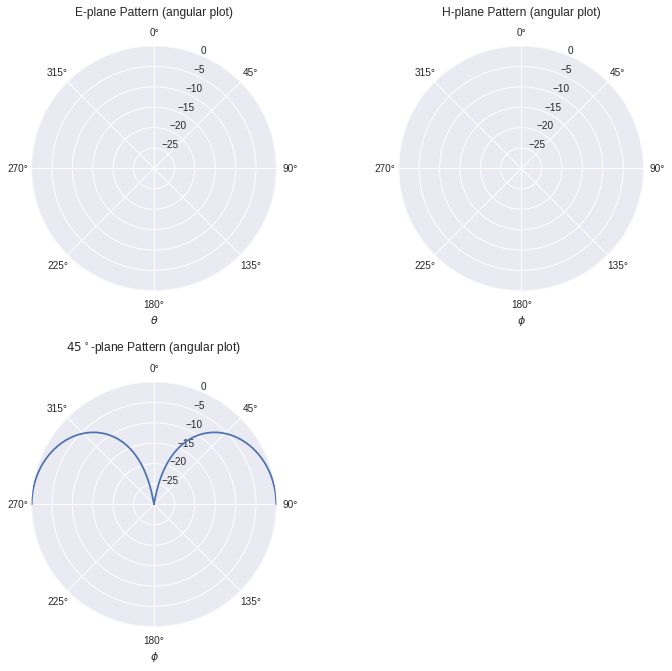

In [86]:
num_pts_theta = 500
theta = np.linspace(-np.pi/2, np.pi/2, num_pts_theta)
scale = 'dB'

plt.figure(figsize = (10,10))
ax = plt.subplot(221, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/2)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

ax = plt.subplot(222, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, 0)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, 0)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'H-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

ax = plt.subplot(223, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
if scale == 'lin':
    ax.plot(theta, (P_n(theta, np.pi/4)))
else:
    ax.plot(theta, 10*np.log10(P_n(theta, np.pi/4)))
    ax.set_rmax(0)
    ax.set_rmin(-30)
ax.set_title(r'$45^\circ$-plane Pattern (angular plot)', y=1.1)
ax.set_xlabel(r'$\phi$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.5)